In [1]:
from CelestialObjects import Planets
from MaterialProperty import MaterialProperty
from NBodySimulator import Simulator
import numpy as np

In [2]:
materials = MaterialProperty(material_list=["silicates"], material_fraction=[1])
material = materials.planet_material_property()
Earth = Planets(name="Earth", mass=5.972e24, init_position=[0,0,0], init_velocity=[0,0,0], radius=6.4e6, planet_type="Rocky", planet_contour="Earth-like", material_property=material)
Moon = Planets(name="Moon", mass=7.348e22, init_position=[3.844e8, 0, 0], init_velocity=[0, 1022.0, 0], radius=1e5, planet_type="Rocky", planet_contour="Mars-like", material_property=material)
Rock = Planets(name="Rock", mass=1e12, radius=1e3, init_position=[1.76e8,0,0], init_velocity=[0, 198.0, 0], planet_contour="Earth-like", planet_type="Rocky", material_property=material)

In [3]:
simulation = Simulator(celestial_bodies=[Earth, Moon, Rock], time_step=10, simulation_time=1e6)

In [4]:
simulation.solve(simulation_method="Lagrangian", solver="Euler")

Collision detected between Celestial Objects Earth and Rock


In [5]:
x = np.array(Earth.trajectory)
y = np.array(Rock.trajectory)
z = np.array(Moon.trajectory)

In [6]:
y.shape

(13138, 3)

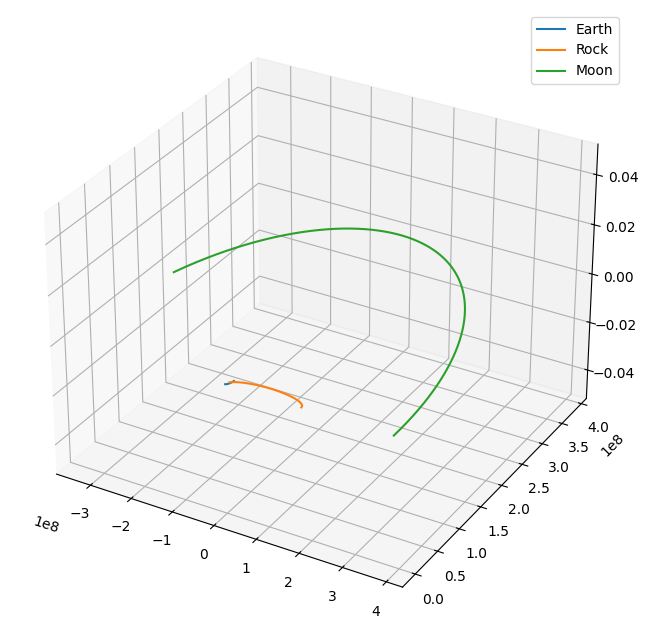

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(x[:,0], x[:,1], x[:,2], label="Earth")
ax.plot(y[:,0], y[:,1], y[:,2], label="Rock")
ax.plot(z[:,0], z[:,1], z[:,2], label="Moon")
plt.legend()